# 激活函数

In [1]:
%matplotlib inline
import torch
import torch.nn.functional as F
from d2l import torch as d2l

# ReLU

要理解并区分
- `torch.nn.ReLU()`
- `torch.nn.functional.relu()`
- `torch.relu()`

`nn.ReLU`作为一个层结构，必须添加到`nn.Module`容器中才能使用，而`F.relu`则作为一个函数调用, 看上去作为一个函数调用更方便更简洁。具体使用哪种方式，取决于编程风格

`nn.X`都有对应的函数版本`F.X`，但是并不是所有的`F.X`均可以用于`forward`或其它代码段中

因为当网络模型训练完毕时，在存储model时，在`forward`中的`F.X`函数中的参数是无法保存的。也就是说，在`forward`中，使用的`F.X`函数一般均没有状态参数，比如`F.relu`，`F.avg_pool2d`等，均没有参数，它们**可以用在任何代码片段**中。

`torch.relu()`并不包含于pytorch的官方文档中，因为它是最底层的调用，来自于通过C++编写的THNN库。

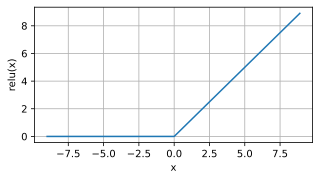

In [2]:
x = torch.arange(-9.0, 9.0, 0.1, requires_grad=True)

# 下面两种方式调用relu函数均可
y1 = torch.relu(x)
y2 = torch.nn.functional.relu(x)

d2l.plot(x.detach(), y2.detach(), "x", "relu(x)", figsize=(5, 2.5))

当输入为负时，relu的导数为0，当输入为正时，relu的导数为1，当输入等于0时，默认使用左侧导数，即导数取0

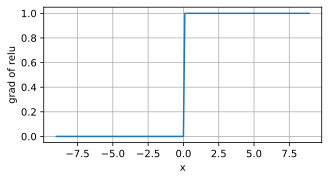

In [3]:
y1.backward(gradient=torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, "x", "grad of relu", figsize=(5,2.5))

In [30]:
x.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
x.grad.zero_()

x.grad

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# pReLU

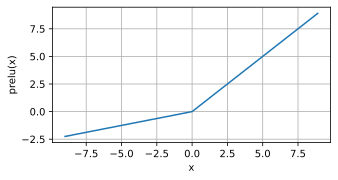

In [10]:
pReLU = torch.nn.PReLU(num_parameters=1, init=0.25)
y = pReLU(x)

d2l.plot(x.detach(), y.detach(), "x", "prelu(x)", figsize=(5, 2.5))

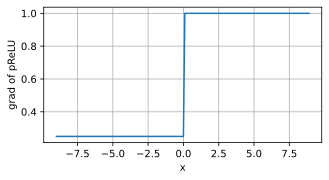

In [11]:
x.grad.zero_()

y.backward(gradient=torch.ones_like(x), retain_graph=True)

d2l.plot(x.detach(), x.grad, "x", "grad of pReLU", figsize=(5, 2.5))

# Sigmoid

`torch.sigmoid()`与`torch.nn.Sigmoid()`以及`torch.nn.functional.sigmoid()`区别：

二者区别可以参考上述的ReLU，用法上需要注意：
- `y = torch.sigmoid(x)` 这是对的，可以直接计算
- `y = torch.nn.functional.sigmoid(x)` 这也是对的，可以直接计算
- `y = torch.nn.Sigmoid(x)` 这是错的！因为这是一个类，要先创建一个对象再计算，即`sigmoid = torch.nn.Sigmoid(); y = sigmoid(x);`

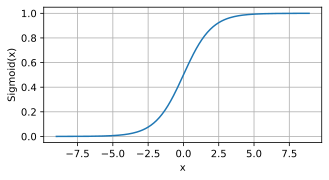

In [4]:
y = torch.sigmoid(x)

d2l.plot(x.detach(), y.detach(), "x", "Sigmoid(x)", figsize=(5, 2.5))

sigmoid函数的导数为：

$sigmoid(x)(1 - sigmoid(x))$

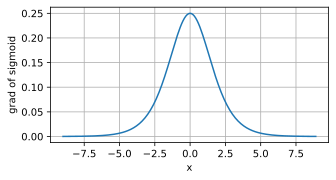

In [7]:
x.grad.zero_()

y.backward(gradient=torch.ones_like(x), retain_graph=True)

d2l.plot(x.detach(), x.grad, "x", "grad of sigmoid", figsize=(5, 2.5))

# tanh

$tanh(x) = \frac{1-exp(-2x)}{1+exp(-2x)}  = \frac{exp(2x)-1}{exp(2x)+1} $

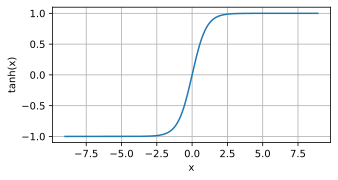

In [8]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), "x", "tanh(x)", figsize=(5, 2.5))

tanh函数的导数为：

$1 - tanh^{2}(x)$

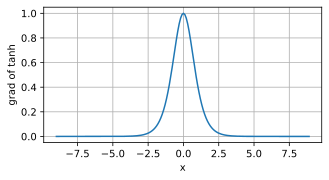

In [9]:
x.grad.zero_()

y.backward(gradient=torch.ones_like(x), retain_graph=True)

d2l.plot(x.detach(), x.grad, "x", "grad of tanh", figsize=(5, 2.5))